In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
#compute predicted length distribution and gt length distribution
costs = []
predlen_dist = {}
gtlen_dist = {}
c=0
with open('../eval.qb', 'r') as f:
    for query in f:
        query = query.strip()
        query = query.split('\t')
        if(len(query)<3):
            continue
        if(query[-1]=='-'):
            continue
        y = query[1]
        pred = query[2]
        predlen_dist[len(pred)] = predlen_dist.get(len(pred), 0) + 1
        gtlen_dist[len(y)] = gtlen_dist.get(len(y), 0) + 1
        # if(query[2] == ''):
        #     c+= 1
        #     print(query)
        #     continue
        costs.append(float(query[3]) / float(query[4]))

Text(0.5, 1.0, 'cost distribution')

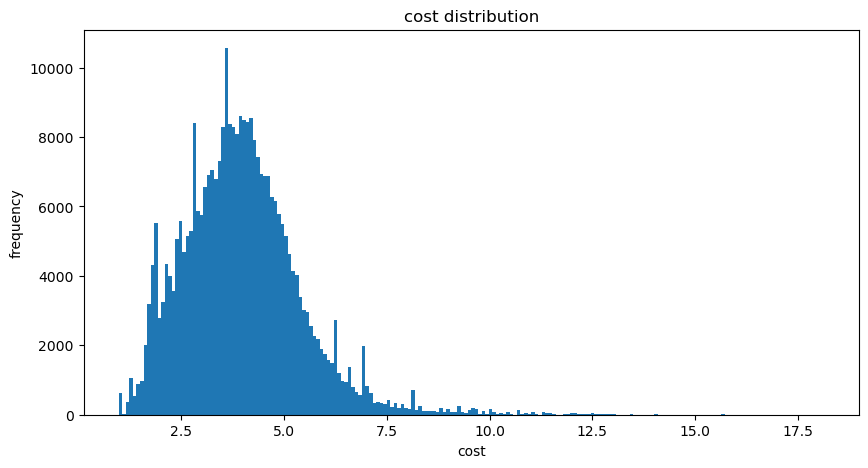

In [16]:
#plot cost distribution using plt
plt.figure(figsize=(10, 5))
plt.hist(costs, bins=200)
plt.xlabel('cost')
plt.ylabel('frequency')
plt.title('cost distribution')

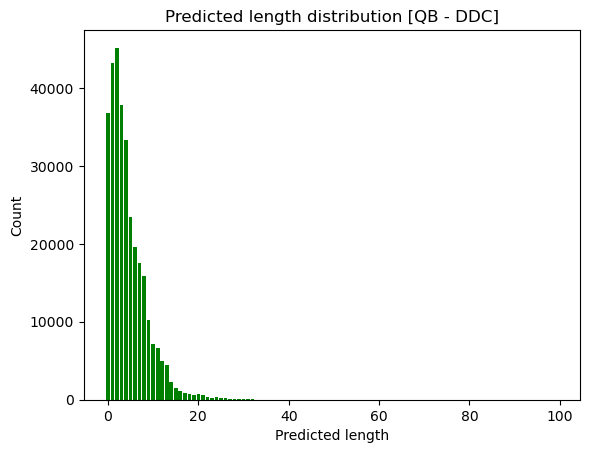

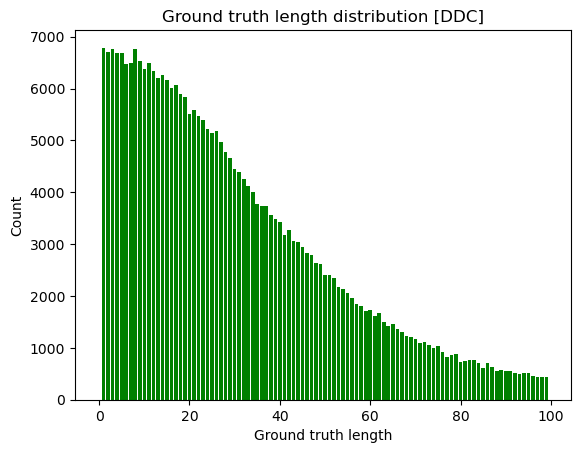

In [12]:
# plt both distributions
x = np.arange(0, 100)
y = []
for i in x:
    y.append(predlen_dist.get(i, 0))
plt.bar(x, y, color='green')
plt.title("Predicted length distribution [QB - DDC]")
plt.xlabel("Predicted length")
plt.ylabel("Count")
plt.show()
y = []
for i in x:
    y.append(gtlen_dist.get(i, 0))
plt.bar(x, y, color='green')
plt.title("Ground truth length distribution [DDC]")
plt.xlabel("Ground truth length")
plt.ylabel("Count")
plt.show()

In [29]:
df = pd.read_csv('../resultsQBrefined4.csv', delimiter = ";")
df = pd.DataFrame(df.values[15:], columns = df.columns)

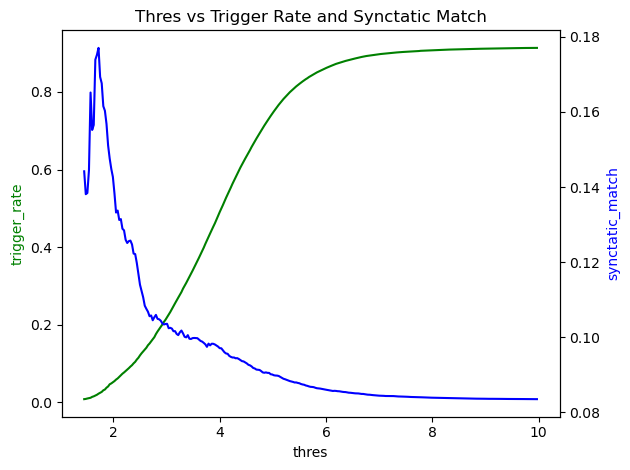

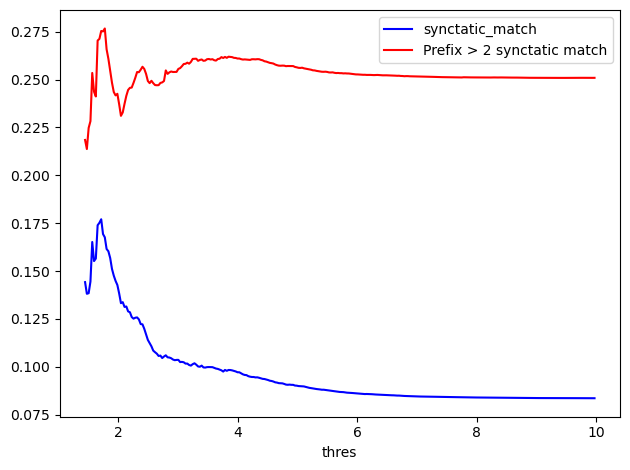

In [30]:
# plot thres vs triger rate and synctatic match using axis twin

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['thres'], df['trigger_rate'], 'g-')
ax2.plot(df['thres'], df['synctatic_match'], 'b-')
ax1.set_xlabel('thres')
ax1.set_ylabel('trigger_rate', color='g')
ax2.set_ylabel('synctatic_match', color='b')
ax1.set_title('Thres vs Trigger Rate and Synctatic Match')
plt.tight_layout()
plt.show()

# plot thres vs synctatic match and Psynctatic match using label

fig, ax1 = plt.subplots()
ax1.plot(df['thres'], df['synctatic_match'], 'b-', label='synctatic_match')
ax1.plot(df['thres'], df['Psynctatic_match'], 'r-', label='Prefix > 2 synctatic match')

ax1.set_xlabel('thres')
ax1.legend()

plt.tight_layout()
plt.show()
